<a href="https://colab.research.google.com/github/manikantagangam/Legal-Document-Summarization/blob/main/pegasus_rougescores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
dataset_path = "/content/drive/My Drive/legal_dataset/"
train = pd.read_csv(dataset_path+"test.csv")
test = pd.read_csv(dataset_path+"test.csv")

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.1 MB/s eta 0:00:00


In [ ]:
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.5 MB/s

In [ ]:
!nvidia-smi

Wed Nov  8 14:52:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from transformers import pipeline, set_seed
# from transformers import load_metric
import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
from datasets import load_dataset, load_metric

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import nltk
from nltk.tokenize import sent_tokenize

from tqdm import tqdm
import torch

nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# pip install --upgrade transformers

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt = "google/pegasus-cnn_dailymail"

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# tokenizer = AutoTokenizer.from_pretrained("nsi319/legal-pegasus")
# model = AutoModelForSeq2SeqLM.from_pretrained("nsi319/legal-pegasus")

model_pegasus = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)

max_sequence_length = tokenizer.model_max_length

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

In [ ]:
def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the  token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score

In [ ]:
train

,File,Judgement,Summary
0,6728.txt,Special Leave Petition Nos.\n823 24 of 1990.\n...,Petitioners ' lands were acquired by the respo...
1,6270.txt,ivil Appeal No. 4649 of 1989.\nFrom the Judgme...,Pursuant to a scheme enacted for the benefit o...
2,1697.txt,"Appeals, Nos. 275 276 of 1963.\nAppeals by spe...","By section 25 (4) of the Income tax Act, ""Wher..."
3,5397.txt,No. 7338 of 1981.\n(Under Article 32 of the Co...,Fundamental Rule 56(j) confers power on the ap...
4,6852.txt,(C) No. 677 of 1988.\n(Under Article 32 of the...,The Lt. Governor of Delhi amended the Delhi Po...
...,...,...,...
95,2392.txt,iminal Appeal No.112 of 1965.\nAppeal by speci...,"M, an accused person in certain proceedings pe..."
96,5364.txt,vil Appeal No. 10761077 of 1987.\nFrom the Jud...,The Life Insurance Corporation was established...
97,496.txt,minal Appeals Nos.\n91 to 93 of 1954.\nAppeals...,It is well settled that common intention in se...
98,2609.txt,No. 65 of 1969.\nPetition under article 32 of ...,The Parliament enacted the Public Employment (...


In [ ]:
# print("Judgement: ", train.iloc[0, 1])
# print("Summary: ", train.iloc[0, 2])

In [ ]:
judgement = train.iloc[0, 1]
# print(judgement)

In [ ]:
# print(summary)

In [ ]:
pipe = pipeline('summarization', model = model_ckpt)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
pipe_out = pipe(judgement)

print(pipe_out)

[{'summary_text': 'The petitioners were the owners of certain lands which were acquired by the respondents under the provisions of Sections 17 and 19 of the Bangalore Development Act, 1976 .<n>It was, inter alia, contended by the petitioners that as the awards in these cases has not been made within two years of the notification making the declaration under Section 4 of the Land Acquisition Act, the entire acquisition proceedings had lapsed .<n>The petitioners preferred these Special Leave Petitions, namely S.L.P. Nos. 823 and 824 of 1990 against the decision of the Devision Bench of that High Court, and obtained an interim stay of'}]


In [ ]:
print(pipe_out[0]['summary_text'].replace(" .<n>", ".\n"))

The petitioners were the owners of certain lands which were acquired by the respondents under the provisions of Sections 17 and 19 of the Bangalore Development Act, 1976.
It was, inter alia, contended by the petitioners that as the awards in these cases has not been made within two years of the notification making the declaration under Section 4 of the Land Acquisition Act, the entire acquisition proceedings had lapsed.
The petitioners preferred these Special Leave Petitions, namely S.L.P. Nos. 823 and 824 of 1990 against the decision of the Devision Bench of that High Court, and obtained an interim stay of


In [ ]:
rouge_metric = load_metric("rouge")

# List to store Rouge scores
rouge_scores = []

max_sequence_length = tokenizer.model_max_length

# Process each judgment
for i, judgement in enumerate(test['Judgement']):
    # Truncate or split the input text
    # input_tokens = tokenizer(judgement, return_tensors="pt", truncation=True, max_length=max_sequence_length, padding="max_length")
    input_tokens = tokenizer(judgement, return_tensors="pt", truncation=True, max_length=max_sequence_length, padding="max_length").to(device)

    # Generate the summary
    output = model_pegasus.generate(input_tokens.input_ids, max_length=100)  # Adjust max_length as needed

    # Decode the generated summary
    generated_summary = tokenizer.decode(output[0], skip_special_tokens=True)

    # Calculate Rouge scores
    rouge_score = rouge_metric.compute(predictions=[generated_summary], references=[test['Summary'][i]])  # Assuming 'Summary' is the reference summary column
    rouge_scores.append(rouge_score)

print(rouge_scores)

<ipython-input-18-1864b1015aa3>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = load_metric("rouge")


[{'rouge1': AggregateScore(low=Score(precision=0.8333333333333334, recall=0.15695067264573992, fmeasure=0.26415094339622647), mid=Score(precision=0.8333333333333334, recall=0.15695067264573992, fmeasure=0.26415094339622647), high=Score(precision=0.8333333333333334, recall=0.15695067264573992, fmeasure=0.26415094339622647)), 'rouge2': AggregateScore(low=Score(precision=0.6144578313253012, recall=0.1146067415730337, fmeasure=0.19318181818181815), mid=Score(precision=0.6144578313253012, recall=0.1146067415730337, fmeasure=0.19318181818181815), high=Score(precision=0.6144578313253012, recall=0.1146067415730337, fmeasure=0.19318181818181815)), 'rougeL': AggregateScore(low=Score(precision=0.7023809523809523, recall=0.13228699551569506, fmeasure=0.22264150943396221), mid=Score(precision=0.7023809523809523, recall=0.13228699551569506, fmeasure=0.22264150943396221), high=Score(precision=0.7023809523809523, recall=0.13228699551569506, fmeasure=0.22264150943396221)), 'rougeLsum': AggregateScore(l

In [ ]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = dict((rn, rouge_score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame(rouge_dict, index = ['pegasus'])

,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.09073,0.047525,0.067061,0.071006


Token indices sequence length is longer than the specified maximum sequence length for this model (2426 > 1024). Running this sequence through the model will result in indexing errors


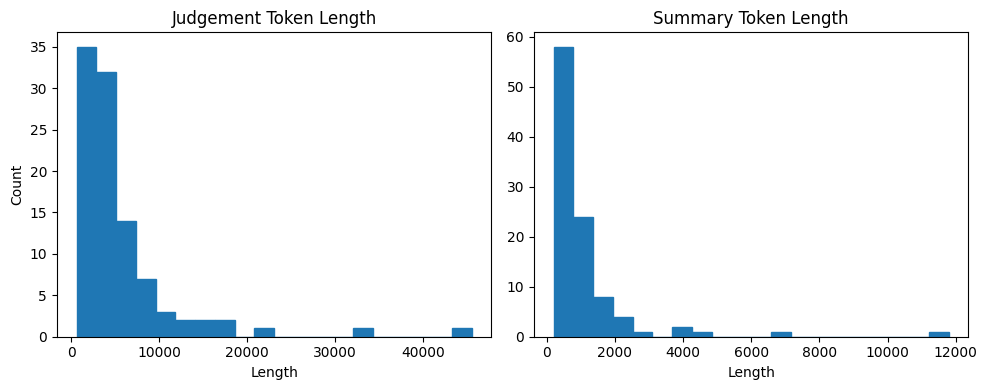

In [ ]:
dialogue_token_len = [len(tokenizer.encode(text)) for text in test['Judgement']]
summary_token_len = [len(tokenizer.encode(text)) for text in test['Summary']]

# Now you can create the histogram
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(dialogue_token_len, bins=20, color='C0', edgecolor='C0')
axes[0].set_title("Judgement Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")

axes[1].hist(summary_token_len, bins=20, color='C0', edgecolor='C0')
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")

plt.tight_layout()
plt.show()


In [ ]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch['Judgement'], max_length=1024, truncation=True, padding=True, return_tensors='pt')

    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch['Summary'], max_length=128, truncation=True, padding=True, return_tensors='pt')

    return {
        'input_ids': input_encodings['input_ids'],
        'attention_mask': input_encodings['attention_mask'],
        'labels': target_encodings['input_ids']
    }

# Assuming you have a test DataFrame with 'Judgement' and 'Summary' columns
test_data = [{'Judgement': text, 'Summary': summary} for text, summary in zip(test['Judgement'], test['Summary'])]

# Process each example in the test data
test_features = [convert_examples_to_features(example) for example in test_data]


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
test_features

[{'input_ids': tensor([[ 3329,  8051, 44168,  ..., 11544,   107,     1]]),
  'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]]),
  'labels': tensor([[82763,   116,  1034,  8872,   195,  4540,   141,   109,  9770,   365,
            4201,  1689,   111,  1925,   113,   109, 12777,  2225,  2046,   108,
           34600,  5456,  4335,   113,   109,   243,  2046,   266,  4056,   109,
            6971,   113,   109,  4003, 32098,  2046,   108, 41861,   108,   241,
            4902,   117,  2245,   197,   141,  2158,   107,   139,  6699,   395,
             109, 12920,   365,  1201,   384,   113,   109,  4003, 32098,  2046,
             115,  2132,   113,   109,  8872,   115,   906,   140,   266,   124,
             599,   107,  6698, 70292,   107,   651,   599,   107,  6698, 48849,
             116,   107,  1073,   202,   140,  2454,   111,  1457,   190,  1937,
             141,   109,  4003, 32098,   143, 74867,   158,  2046,   108, 13937,
           31328,   120,   241,   109, 12920,   3

In [ ]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model_pegasus)

In [ ]:
from transformers import TrainingArguments, Trainer

trainer_args = TrainingArguments(
    output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=500,
    per_device_train_batch_size=1, per_device_eval_batch_size=1,
    weight_decay=0.01, logging_steps=10,
    evaluation_strategy='steps', eval_steps=500, save_steps=1e6,
    gradient_accumulation_steps=16
)

In [ ]:
pip install accelerate -U

In [ ]:
pip install transformers[torch]

In [ ]:
pip install accelerate>=0.20.1

In [ ]:
import sys
sys.executable

'/usr/bin/python3'

In [ ]:
from datasets import Dataset, DatasetDict

def preprocess_function(examples):
    # Tokenize the input and target texts
    inputs = tokenizer(examples["Judgement"], max_length=1024, truncation=True, padding="max_length")
    targets = tokenizer(examples["Summary"], max_length=128, truncation=True, padding="max_length")

    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": targets["input_ids"],
    }

# Create datasets using the custom preprocessing function
train_dataset = Dataset.from_pandas(train)
test_dataset = Dataset.from_pandas(test)

# Apply the preprocessing function to both train and test datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Create a DatasetDict to store train and test datasets
dataset_dict = DatasetDict({"train": train_dataset, "test": test_dataset})

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
trainer = Trainer(
    model=model_pegasus,
    args=trainer_args,
    tokenizer=tokenizer,
    data_collator=seq2seq_data_collator,
    train_dataset=dataset_dict["train"],
    eval_dataset=dataset_dict["test"]
)

NameError: ignored

In [ ]:
trainer.train()

In [ ]:

score = calculate_metric_on_test_ds(
    test_dataset,
    rouge_metric,
    model_pegasus,
    tokenizer,
    batch_size=2,
    column_text='Judgement',
    column_summary='Summary'
)

rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)

pd.DataFrame(rouge_dict, index=[f'pegasus'])


In [ ]:
## Save model
model_pegasus.save_pretrained("pegasus-legal-model")